# Imports and files

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
path = ""
slotsDf = pd.read_csv(os.path.join(path, "clean-data/slots.csv"))
participantsDf = pd.read_csv(os.path.join(path, "clean-data/participants.csv"))
focusTimesDf = pd.read_csv(os.path.join(path, "clean-data/focusTimes.csv"))
expDf = pd.read_csv(os.path.join(path, "clean-data/experiments.csv"))
scoresDf = pd.read_csv(os.path.join(path, "computed-data/scores.csv"))

In [7]:
expDf = (expDf
  .set_index(["participantId","device","datasetId"])
  .join(
      scoresDf
      .set_index(["participantId","device","datasetId"])
  )
  .reset_index())

In [8]:
order =[]
for i in expDf['experimentOrder']:
  if (i ==1) | (i==3):
    order.append(1)
  else:
    order.append(2)
expDf['sequenceOrder']=order

In [9]:
sns.set_context("poster", 0.7)
sns.set_style("whitegrid")

# Compare pause time in VR and comp

the graph hide one point that is very high !

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


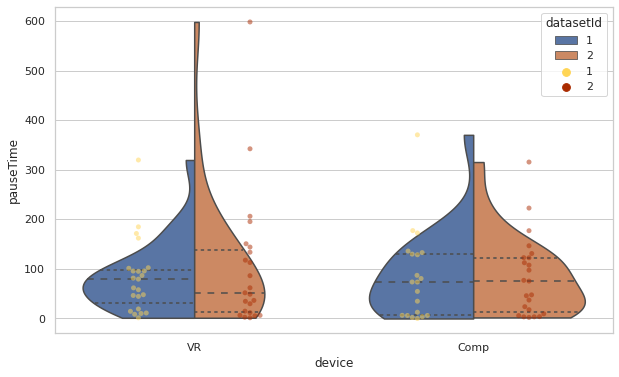

In [ ]:
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
sns.violinplot(x='device', y='pauseTime', hue='datasetId', split=True, data=expDf[expDf['pauseTime']<1200],inner='quartiles', cut=0)
ax = sns.swarmplot(x='device', y='pauseTime', hue='datasetId',split=True, data=expDf.query("pauseTime < 800"), palette="afmhot_r", edgecolor="grey", alpha=0.5)